In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import time
from sklearn.model_selection import cross_val_score
from time import process_time

In [2]:
cv=pd.read_csv('covid_train.csv')
cv.head(10)

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50s,MALE,NO KNOWN EPI LINK,Oakville,NaN,43.413997,-79.744796,Resolved
1,20s,FEMALE,CC,Guelph,NaN,43.524881,-80.233743,Not Resolved
2,90s,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20s,FEMALE,MISSING INFORMATION,Toronto,NaN,43.656591,-79.379358,Resolved
4,90s,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal
5,60s,MALE,OB,Newmarket,Yes,44.048023,-79.480239,Fatal
6,70s,MALE,NO KNOWN EPI LINK,Thorold,NaN,43.116537,-79.241220,Fatal
7,50s,MALE,MISSING INFORMATION,Toronto,NaN,43.656591,-79.379358,Not Resolved
8,90s,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Fatal
9,90s,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Fatal


In [3]:
cv.shape

(14851, 8)

In [4]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14851 entries, 0 to 14850
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age_Group                14845 non-null  object 
 1   Client_Gender            14851 non-null  object 
 2   Case_AcquisitionInfo     14851 non-null  object 
 3   Reporting_PHU_City       14851 non-null  object 
 4   Outbreak_Related         5831 non-null   object 
 5   Reporting_PHU_Latitude   14851 non-null  float64
 6   Reporting_PHU_Longitude  14851 non-null  float64
 7   Outcome1                 14851 non-null  object 
dtypes: float64(2), object(6)
memory usage: 928.3+ KB


### Replace null values in feature "Outbreak_Related" with 'No'

In [5]:
cv["Outbreak_Related"].fillna("No",inplace= True)
cv.head(10)

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50s,MALE,NO KNOWN EPI LINK,Oakville,No,43.413997,-79.744796,Resolved
1,20s,FEMALE,CC,Guelph,No,43.524881,-80.233743,Not Resolved
2,90s,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20s,FEMALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358,Resolved
4,90s,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal
5,60s,MALE,OB,Newmarket,Yes,44.048023,-79.480239,Fatal
6,70s,MALE,NO KNOWN EPI LINK,Thorold,No,43.116537,-79.241220,Fatal
7,50s,MALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358,Not Resolved
8,90s,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Fatal
9,90s,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Fatal


In [6]:
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14851 entries, 0 to 14850
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age_Group                14845 non-null  object 
 1   Client_Gender            14851 non-null  object 
 2   Case_AcquisitionInfo     14851 non-null  object 
 3   Reporting_PHU_City       14851 non-null  object 
 4   Outbreak_Related         14851 non-null  object 
 5   Reporting_PHU_Latitude   14851 non-null  float64
 6   Reporting_PHU_Longitude  14851 non-null  float64
 7   Outcome1                 14851 non-null  object 
dtypes: float64(2), object(6)
memory usage: 928.3+ KB


### The null values in feature "Age_Group" is dropped here, as predicting the same may not be accurate.

In [7]:
cv1=cv.dropna()
cv1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14845 entries, 0 to 14850
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age_Group                14845 non-null  object 
 1   Client_Gender            14845 non-null  object 
 2   Case_AcquisitionInfo     14845 non-null  object 
 3   Reporting_PHU_City       14845 non-null  object 
 4   Outbreak_Related         14845 non-null  object 
 5   Reporting_PHU_Latitude   14845 non-null  float64
 6   Reporting_PHU_Longitude  14845 non-null  float64
 7   Outcome1                 14845 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


After removing the null values, looking at the Client_Gender feature

In [8]:
cv1['Client_Gender'].value_counts()

FEMALE            7496
MALE              7243
UNSPECIFIED        104
GENDER DIVERSE       2
Name: Client_Gender, dtype: int64

We can see the 104 Observations of UNSPECIFIED Gender and 'only 2' observations for Gender Diverse.

Removing them won't affect our model referring the total observations in 14000s. We can consider them as outlier and remove them for effective modelling in our case.

In [9]:
gender_DIVERSE = []
gender_DIVERSE = cv1[(cv1 ['Client_Gender'] == 'GENDER DIVERSE')]['Client_Gender'].index #Removing the Diverse Gender

In [10]:
cv1.drop(index=gender_DIVERSE, inplace = True ,axis=1) 
#As 104 values are there out of 14,845 data with unspecified gender (0.7% of total data),we can consider them 
##as outlier and thereby removing them for better modelling.

D:\Anaconda\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [11]:
cv1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14843 entries, 0 to 14850
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age_Group                14843 non-null  object 
 1   Client_Gender            14843 non-null  object 
 2   Case_AcquisitionInfo     14843 non-null  object 
 3   Reporting_PHU_City       14843 non-null  object 
 4   Outbreak_Related         14843 non-null  object 
 5   Reporting_PHU_Latitude   14843 non-null  float64
 6   Reporting_PHU_Longitude  14843 non-null  float64
 7   Outcome1                 14843 non-null  object 
dtypes: float64(2), object(6)
memory usage: 1.0+ MB


In [12]:
#Replacing <20 to 0 and from 20s to 90s to 1 to 8 values in the Age_Group feature 
#Converting String to numeric Values

cv1.Age_Group = cv1.Age_Group.replace({'<20':0,'20s':1,'30s':2,'40s':3,'50s':4,'60s':5,'70s':6,'80s':7,'90s':8})
cv1

D:\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,4,MALE,NO KNOWN EPI LINK,Oakville,No,43.413997,-79.744796,Resolved
1,1,FEMALE,CC,Guelph,No,43.524881,-80.233743,Not Resolved
2,8,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,1,FEMALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358,Resolved
4,8,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal
...,...,...,...,...,...,...,...,...
14846,0,FEMALE,CC,Hamilton,No,43.257631,-79.871341,Not Resolved
14847,1,FEMALE,NO KNOWN EPI LINK,Mississauga,No,43.647471,-79.708893,Not Resolved
14848,7,MALE,OB,Thorold,Yes,43.116537,-79.241220,Fatal
14849,4,FEMALE,CC,Newmarket,No,44.048023,-79.480239,Fatal


In [13]:
cv1.head(10) #We can see the feature Age_group is changed in ascending order from under 20 to 90s Age group

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,4,MALE,NO KNOWN EPI LINK,Oakville,No,43.413997,-79.744796,Resolved
1,1,FEMALE,CC,Guelph,No,43.524881,-80.233743,Not Resolved
2,8,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,1,FEMALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358,Resolved
4,8,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal
5,5,MALE,OB,Newmarket,Yes,44.048023,-79.480239,Fatal
6,6,MALE,NO KNOWN EPI LINK,Thorold,No,43.116537,-79.241220,Fatal
7,4,MALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358,Not Resolved
8,8,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Fatal
9,8,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Fatal


Co-ordinates features,Reporting_PHU_Latitude and Reporting_PHU_Longitude features are not adding value to the model. 

We have tried calculating the validation accuracy with and without them, and its not much impact on our model.

So, we are dropping those two features 'Reporting_PHU_Latitude' and 'Reporting_PHU_Longitude'

In [14]:
cv2=cv1.drop(['Reporting_PHU_Latitude','Reporting_PHU_Longitude'], axis=1)
cv2


,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Outcome1
0,4,MALE,NO KNOWN EPI LINK,Oakville,No,Resolved
1,1,FEMALE,CC,Guelph,No,Not Resolved
2,8,FEMALE,OB,Barrie,Yes,Resolved
3,1,FEMALE,MISSING INFORMATION,Toronto,No,Resolved
4,8,FEMALE,OB,Ottawa,Yes,Fatal
...,...,...,...,...,...,...
14846,0,FEMALE,CC,Hamilton,No,Not Resolved
14847,1,FEMALE,NO KNOWN EPI LINK,Mississauga,No,Not Resolved
14848,7,MALE,OB,Thorold,Yes,Fatal
14849,4,FEMALE,CC,Newmarket,No,Fatal


In [15]:
#https://stackoverflow.com/questions/38088652/pandas-convert-categories-to-numbers
cv1.Reporting_PHU_City=pd.Categorical(cv1.Reporting_PHU_City)


D:\Anaconda\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [16]:
cv1['Reporting_PHU_City'] = cv1.Reporting_PHU_City.cat.codes
cv1

<ipython-input-16-ebcad0d330da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv1['Reporting_PHU_City'] = cv1.Reporting_PHU_City.cat.codes


,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,4,MALE,NO KNOWN EPI LINK,15,No,43.413997,-79.744796,Resolved
1,1,FEMALE,CC,6,No,43.524881,-80.233743,Not Resolved
2,8,FEMALE,OB,0,Yes,44.410713,-79.686306,Resolved
3,1,FEMALE,MISSING INFORMATION,30,No,43.656591,-79.379358,Resolved
4,8,FEMALE,OB,16,Yes,45.345665,-75.763912,Fatal
...,...,...,...,...,...,...,...,...
14846,0,FEMALE,CC,7,No,43.257631,-79.871341,Not Resolved
14847,1,FEMALE,NO KNOWN EPI LINK,11,No,43.647471,-79.708893,Not Resolved
14848,7,MALE,OB,27,Yes,43.116537,-79.241220,Fatal
14849,4,FEMALE,CC,13,No,44.048023,-79.480239,Fatal


In [17]:
# One hot encoding (Binary encoding) 
# Creating the dummies for the categorical & binary features
#We have taken the Reporting PHU Cities in one hot encoding ,too . As label encoding labels with probability,
## which isn't true in the case of cities and not accurate.

cv2_d= pd.get_dummies(cv1, columns=['Client_Gender','Case_AcquisitionInfo','Outbreak_Related']) 
cv2_d.head(10)

,Age_Group,Reporting_PHU_City,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1,Client_Gender_FEMALE,Client_Gender_MALE,Client_Gender_UNSPECIFIED,Case_AcquisitionInfo_CC,Case_AcquisitionInfo_MISSING INFORMATION,Case_AcquisitionInfo_NO KNOWN EPI LINK,Case_AcquisitionInfo_OB,Case_AcquisitionInfo_TRAVEL,Case_AcquisitionInfo_UNSPECIFIED EPI LINK,Outbreak_Related_No,Outbreak_Related_Yes
0,4,15,43.413997,-79.744796,Resolved,0,1,0,0,0,1,0,0,0,1,0
1,1,6,43.524881,-80.233743,Not Resolved,1,0,0,1,0,0,0,0,0,1,0
2,8,0,44.410713,-79.686306,Resolved,1,0,0,0,0,0,1,0,0,0,1
3,1,30,43.656591,-79.379358,Resolved,1,0,0,0,1,0,0,0,0,1,0
4,8,16,45.345665,-75.763912,Fatal,1,0,0,0,0,0,1,0,0,0,1
5,5,13,44.048023,-79.480239,Fatal,0,1,0,0,0,0,1,0,0,0,1
6,6,27,43.116537,-79.241220,Fatal,0,1,0,0,0,1,0,0,0,1,0
7,4,30,43.656591,-79.379358,Not Resolved,0,1,0,0,1,0,0,0,0,1,0
8,8,30,43.656591,-79.379358,Fatal,1,0,0,0,0,0,1,0,0,0,1
9,8,30,43.656591,-79.379358,Fatal,1,0,0,0,0,0,1,0,0,0,1


In [18]:
cv2_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14843 entries, 0 to 14850
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age_Group                                  14843 non-null  int64  
 1   Reporting_PHU_City                         14843 non-null  int8   
 2   Reporting_PHU_Latitude                     14843 non-null  float64
 3   Reporting_PHU_Longitude                    14843 non-null  float64
 4   Outcome1                                   14843 non-null  object 
 5   Client_Gender_FEMALE                       14843 non-null  uint8  
 6   Client_Gender_MALE                         14843 non-null  uint8  
 7   Client_Gender_UNSPECIFIED                  14843 non-null  uint8  
 8   Case_AcquisitionInfo_CC                    14843 non-null  uint8  
 9   Case_AcquisitionInfo_MISSING INFORMATION   14843 non-null  uint8  
 10  Case_AcquisitionInfo_N

#### Now, we have our data (cv2_d) with pre-processing and we can model them with the classifier, ensemble methods 

In [19]:
#Segregation of features
x_covid=cv2_d.drop(['Outcome1'],axis=1)
x_covid.head(10)

,Age_Group,Reporting_PHU_City,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE,Client_Gender_UNSPECIFIED,Case_AcquisitionInfo_CC,Case_AcquisitionInfo_MISSING INFORMATION,Case_AcquisitionInfo_NO KNOWN EPI LINK,Case_AcquisitionInfo_OB,Case_AcquisitionInfo_TRAVEL,Case_AcquisitionInfo_UNSPECIFIED EPI LINK,Outbreak_Related_No,Outbreak_Related_Yes
0,4,15,43.413997,-79.744796,0,1,0,0,0,1,0,0,0,1,0
1,1,6,43.524881,-80.233743,1,0,0,1,0,0,0,0,0,1,0
2,8,0,44.410713,-79.686306,1,0,0,0,0,0,1,0,0,0,1
3,1,30,43.656591,-79.379358,1,0,0,0,1,0,0,0,0,1,0
4,8,16,45.345665,-75.763912,1,0,0,0,0,0,1,0,0,0,1
5,5,13,44.048023,-79.480239,0,1,0,0,0,0,1,0,0,0,1
6,6,27,43.116537,-79.241220,0,1,0,0,0,1,0,0,0,1,0
7,4,30,43.656591,-79.379358,0,1,0,0,1,0,0,0,0,1,0
8,8,30,43.656591,-79.379358,1,0,0,0,0,0,1,0,0,0,1
9,8,30,43.656591,-79.379358,1,0,0,0,0,0,1,0,0,0,1


In [20]:
x_covid.shape

(14843, 15)

In [21]:
x_covid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14843 entries, 0 to 14850
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age_Group                                  14843 non-null  int64  
 1   Reporting_PHU_City                         14843 non-null  int8   
 2   Reporting_PHU_Latitude                     14843 non-null  float64
 3   Reporting_PHU_Longitude                    14843 non-null  float64
 4   Client_Gender_FEMALE                       14843 non-null  uint8  
 5   Client_Gender_MALE                         14843 non-null  uint8  
 6   Client_Gender_UNSPECIFIED                  14843 non-null  uint8  
 7   Case_AcquisitionInfo_CC                    14843 non-null  uint8  
 8   Case_AcquisitionInfo_MISSING INFORMATION   14843 non-null  uint8  
 9   Case_AcquisitionInfo_NO KNOWN EPI LINK     14843 non-null  uint8  
 10  Case_AcquisitionInfo_O

In [27]:
#Segregation of outcome1, Target, for covid cases
y_covid=cv2_d['Outcome1']
y_covid.shape

(14843,)

In [32]:
#Splitting the dataset in training and testing
import sklearn
import time
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_covid,y_covid,test_size=0.2, random_state=0)
x_train.shape , x_test.shape

((11874, 15), (2969, 15))

In [34]:
df1 = pd.DataFrame(x_train)
df2 = pd.DataFrame(x_test)

In [41]:
df1.to_csv (r'C:\Users\Admin\Desktop\University of Waterloo\ECE 657A DKMA\Assignment 4\a.csv', index = False, header=True)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Admin\\Desktop\\University of Waterloo\\ECE 657A DKMA\\Assignment 4\\a.csv'

# Question 1 : Tree based Classifiers and Ensembles 
### Part 1:

#### [CM2]

## 1. Decision Tree Classifier

In [183]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf1=DecisionTreeClassifier()
clf1.fit(x_train,y_train)
y_pred1=clf1.predict(x_train)
a1= accuracy_score(y_train,y_pred1)
print("Training accuracy:" ,a1)

Training accuracy: 0.7223345123799899


[Text(812.0518250263598, 1064.55, 'X[0] <= 5.5\ngini = 0.667\nsamples = 11874\nvalue = [3955, 3921, 3998]'),
 Text(658.5651054180928, 1019.25, 'X[8] <= 0.5\ngini = 0.558\nsamples = 7502\nvalue = [486, 3407, 3609]'),
 Text(548.6176616029669, 973.95, 'X[0] <= 4.5\ngini = 0.554\nsamples = 5572\nvalue = [421, 2120, 3031]'),
 Text(426.58495238551967, 928.6500000000001, 'X[3] <= -79.684\ngini = 0.511\nsamples = 4701\nvalue = [128, 1881, 2692]'),
 Text(313.6664702302701, 883.35, 'X[1] <= 32.0\ngini = 0.516\nsamples = 2797\nvalue = [51, 1280, 1466]'),
 Text(261.05337957895125, 838.05, 'X[10] <= 0.5\ngini = 0.516\nsamples = 2599\nvalue = [44, 1231, 1324]'),
 Text(202.389546386596, 792.75, 'X[0] <= 3.5\ngini = 0.51\nsamples = 2152\nvalue = [28, 978, 1146]'),
 Text(172.0024230338138, 747.45, 'X[1] <= 28.5\ngini = 0.5\nsamples = 1766\nvalue = [10, 788, 968]'),
 Text(151.91031828752202, 702.1500000000001, 'X[1] <= 25.5\ngini = 0.502\nsamples = 1649\nvalue = [9, 749, 891]'),
 Text(132.11394085728654

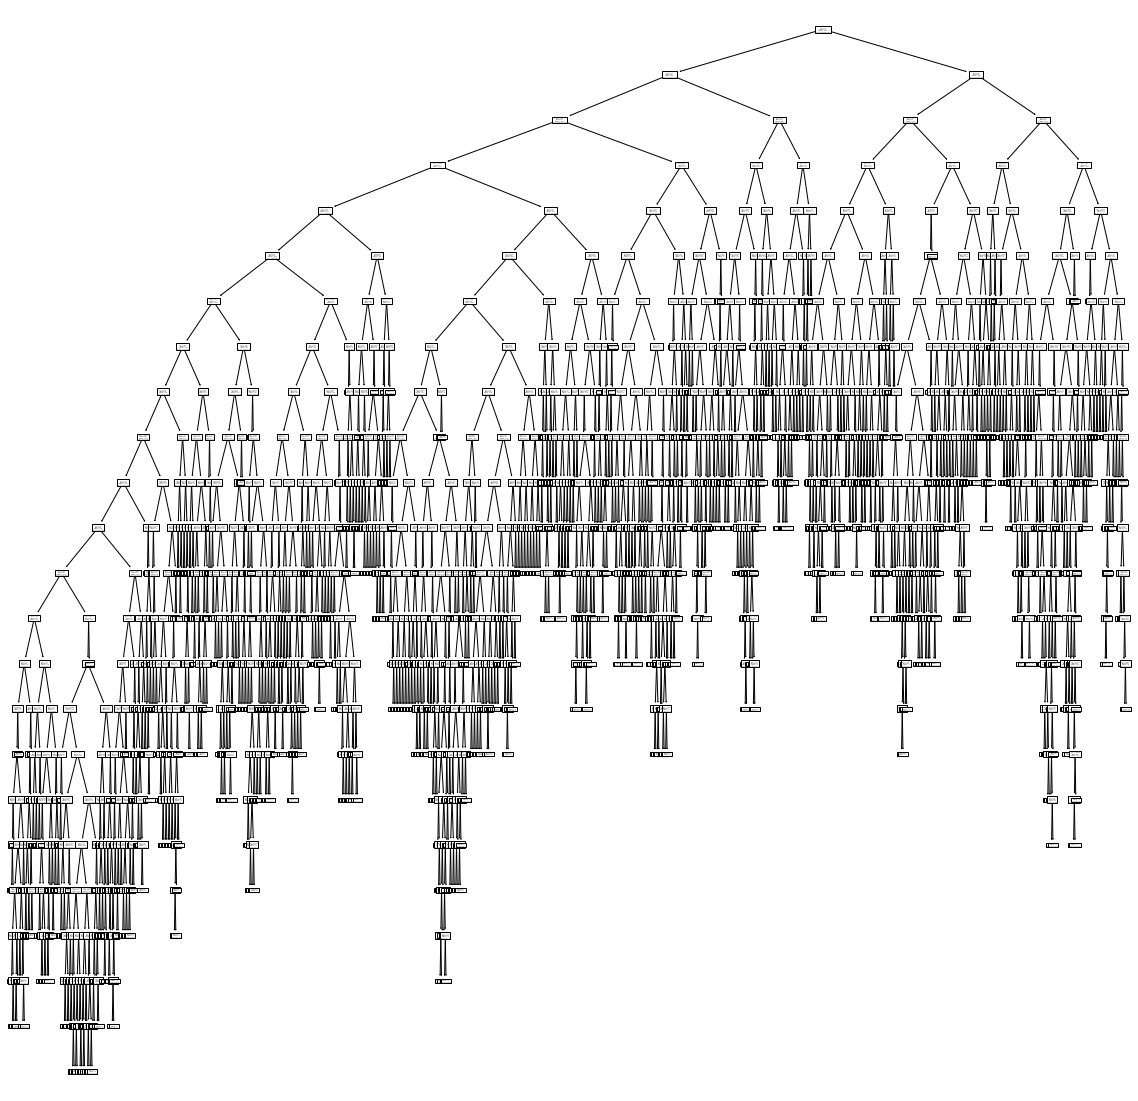

In [186]:
from sklearn import tree
plt.figure(figsize=[20,20])
tree.plot_tree(clf1)

In [189]:
#for different values of maximum depth ,
#Evaluating the hyper parameter max. depth of decision tree with 10 fold cross validation for validation accuracy
#Criterion = 'gini'
m=[3,5,10,None] #max_depth
ac_tree= []
times = []
for n in m:
    clf1_crossval= DecisionTreeClassifier(criterion='gini',max_depth=n, random_state=0, splitter='best')
    t1 = time.process_time()
    score = cross_val_score(clf1_crossval, x_train, y_train, cv = 10)
    t2= time.process_time()
    ac_tree.append (score.mean()*100) #We will take mean of the accuracy score of 10 fold cross validation
    times.append(t2-t1)
    ##We are calculating process time for each iteration to understand,
    ##how rich the computation process is.

In [194]:
for max_depth, accuracy,t in zip(m, ac_tree, times):
    print ( "For %r max depth of tree , Accuracy is  %.4f in %.4f seconds" % (max_depth, accuracy, t))

For 3 max depth of tree , Accuracy is  65.5719 in 0.4531 seconds
For 5 max depth of tree , Accuracy is  66.4644 in 0.3906 seconds
For 10 max depth of tree , Accuracy is  66.2287 in 0.4219 seconds
For None max depth of tree , Accuracy is  64.3002 in 0.5156 seconds


In [195]:
#for different values of maximum depth ,
#Evaluating the hyper parameter max. depth of decision tree with 10 fold cross validation for validation accuracy
#Criterion = 'entropy'
m=[3,5,10,None]
ac_tree_e= []
times_e= []
for n in m:
    clf1_crossval= DecisionTreeClassifier(criterion = 'entropy' ,max_depth=n, random_state=0 , splitter = 'best')
    t1 = time.process_time()
    score = cross_val_score(clf1_crossval, x_train, y_train, cv = 10)
    t2= time.process_time()
    ac_tree_e.append (score.mean()*100) #We will take mean of the accuracy score of 10 fold cross validation
    times_e.append(t2-t1)
    ##We are calculating process time for each iteration to understand,
    ##how rich the computation process is.

In [196]:
for max_depth, accuracy,t in zip(m, ac_tree_e, times_e):
    print ( "At max depth ' %r ' of tree , Accuracy: %.4f percent in %.4f seconds" % (max_depth, accuracy, t))

At max depth ' 3 ' of tree , Accuracy: 64.9486 percent in 0.3438 seconds
At max depth ' 5 ' of tree , Accuracy: 66.2371 percent in 0.3438 seconds
At max depth ' 10 ' of tree , Accuracy: 66.0016 percent in 0.5312 seconds
At max depth ' None ' of tree , Accuracy: 64.1822 percent in 0.4688 seconds


In [197]:
max_DT = max(ac_tree) 
max_DT

66.46444790505448

**Observations for Decision Tree Classifier:**
1. The best accuracy comes out to 66.46% when parameters are set to criterion = 'gini', max_depth = 5, random_state = 0 and splitter = best.
2. Also, the computational time for the above parameters is 0.3906 seconds.
3. Best parameter observed for Decision Tree Classifier: max depth = 5, criterion = 'gini', splitter= best and min_samples_split=2 (default).
4. At max_depth = None, the nodes with expand till each of the leaf becomes pure. This may lead to overfit the model which is not desirable.
5. From the plot below, it is clear that for initial values of max_depth (from 3 to 5), the accuracy is increasing. Also, From max_depth 5 to 10, the accuracy seems to be in the decreasing order.

Text(0, 0.5, 'Accuracy')

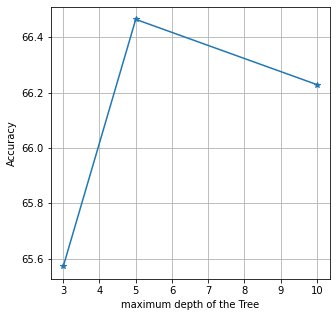

In [198]:
#Plotting mean validation accuracy of decision tree classifier against max depth.of tree.
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(m,ac_tree,"-*")
plt.grid()
plt.xlabel('maximum depth of the Tree')
plt.ylabel('Accuracy')

## 2. Random Forest Classifier.

In [199]:
from sklearn.ensemble import RandomForestClassifier
clf2=RandomForestClassifier() #clf2 ,here it is random forest classifier
clf2.fit(x_train,y_train)
y_pred1=clf2.predict(x_train)
a1= accuracy_score(y_train,y_pred1) #Accuracy score without cross validation on training set only
print("Training accuracy:" ,a1)

Training accuracy: 0.7223345123799899


In [200]:
#for different values of maximum depth  and no. of trees (n_estimator),
#Evaluating the hyper parameter max. depth of decision tree and no. of trees with 10 fold cross validation
#for validation accuracy
max_d=[3,5,10,None]
n_estimator= [5, 10, 50, 150, 200]
ac_RF= []
times_RF= []
for a in max_d:
    for b in n_estimator:
        clf2_crossval= RandomForestClassifier (max_depth=a, n_estimators=b, random_state=0) #Random state is zero
        t1 = time.process_time()
        score = cross_val_score(clf2_crossval, x_train, y_train, cv = 10 ) # 10 fold cross validation
        t2= time.process_time()
        ac_RF.append (score.mean()*100) #We will take mean of the accuracy score of 10 fold cross validation
        times_RF.append(t2-t1)
    ##We are calculating process time for each iteration to understand,
    ##how rich the computation process is.

In [201]:
ac_RF = np.reshape ( ac_RF, (4,5))
#Each row indicate accuracy for each depth consecutively from (3,5,10,None) 
# for no. of trees ( 5,10,50,150,200)
ac_RF

array([[60.11449797, 61.67228307, 62.18614111, 63.91257421, 63.81988943],
       [63.84560999, 65.05824178, 65.33589901, 66.9866029 , 67.07920968],
       [66.32967558, 66.26238515, 66.91926283, 66.80981395, 66.78454015],
       [64.49377232, 64.32535124, 64.62853046, 64.82223243, 64.89806092]])

In [202]:
times_RF= np.reshape ( times_RF, (4,5))
#Each row indicate process time of operation of computation for each depth consecutively from (3,5,10,None) 
# for no. of trees ( 5,10,50,150,200)
times_RF

array([[ 0.5625  ,  0.765625,  2.828125,  7.6875  , 10.1875  ],
       [ 0.59375 ,  0.90625 ,  3.15625 ,  9.046875, 11.765625],
       [ 0.609375,  1.046875,  4.140625, 12.015625, 16.015625],
       [ 0.671875,  1.328125,  5.34375 , 15.671875, 20.484375]])

In [203]:
for a in range(len(max_d)):
    for b in range(len(n_estimator)):
        print ("At max depth: " + str(max_d[a]) + " & no. of trees: " + str (n_estimator[b]) + ", Accuracy: "
               + str(ac_RF[a][b]) + " percent in process time " + str(times_RF[a][b]) + " sec." )

At max depth: 3 & no. of trees: 5, Accuracy: 60.114497970437306 percent in process time 0.5625 sec.
At max depth: 3 & no. of trees: 10, Accuracy: 61.67228306655434 percent in process time 0.765625 sec.
At max depth: 3 & no. of trees: 50, Accuracy: 62.18614110779234 percent in process time 2.828125 sec.
At max depth: 3 & no. of trees: 150, Accuracy: 63.91257421164751 percent in process time 7.6875 sec.
At max depth: 3 & no. of trees: 200, Accuracy: 63.819889430672916 percent in process time 10.1875 sec.
At max depth: 5 & no. of trees: 5, Accuracy: 63.84560998924942 percent in process time 0.59375 sec.
At max depth: 5 & no. of trees: 10, Accuracy: 65.05824178317859 percent in process time 0.90625 sec.
At max depth: 5 & no. of trees: 50, Accuracy: 65.33589900691838 percent in process time 3.15625 sec.
At max depth: 5 & no. of trees: 150, Accuracy: 66.98660290067198 percent in process time 9.046875 sec.
At max depth: 5 & no. of trees: 200, Accuracy: 67.07920967609257 percent in process tim

<AxesSubplot:>

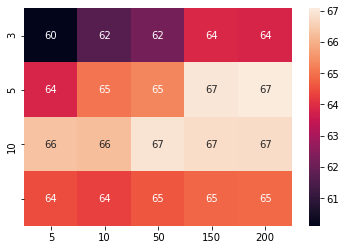

In [204]:
#Heatmap as required 
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap (ac_RF, xticklabels = n_estimator,yticklabels = max_d, annot= True)

<AxesSubplot:>

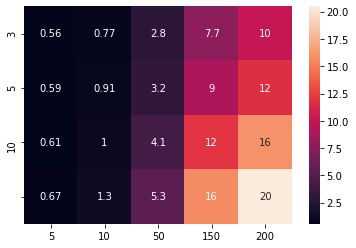

In [205]:
#Heatmap as required 
#https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap (times_RF, xticklabels = n_estimator, yticklabels = max_d, annot= True)

In [206]:
max_RF1= [] #Max Accuracy for RF
for i in [0,1,2,3]:
    max_RF= max(ac_RF[i])
    max_RF1.append(max_RF)
max_rf2= max(max_RF1)
max_rf2 #At Max_depth = 5 and No. of trees = 200 

67.07920967609257

**Observations for Random Forest Classifier:**
1. From the above heatmap, it can be visualise that for max_depth = 3 and number of trees = 5, the accuracy is minimum (~ 60%). Thus, we can say that the model may underfit.
2. The accuracy seems to be varying finely between 60% to 67% for different values of max_depth (3,5,10,None).
3. For max_depth 3,5,10,None: with the increase in number of trees, the computational time is also increasing significantly.
4. The best validation accuracy is observed for parameters max_depth = 5, number of trees = 200 and random_state = 0.
5. The best validation accuracy is 67.079% with process time 11.7656 seconds.

## 3 : Gradient Tree Boosting.

In [207]:
from sklearn.ensemble import GradientBoostingClassifier
clf3=GradientBoostingClassifier() #clf3 ,here it is Gradient Tree Boosting
clf3.fit(x_train,y_train)
y_pred1=clf3.predict(x_train)
a1= accuracy_score(y_train,y_pred1) #Accuracy score without cross validation on training set only
print("Training accuracy:" ,a1)

Training accuracy: 0.6849418898433552


In [208]:
#for different values of number of trees ,
#Evaluating the number of trees hyper parameter with 10 fold cross validation for validation accuracy
n_estimator11= [5, 10, 50, 150, 200]
ac_XB= []
times_XB= []
for n in n_estimator11:
    clf3_crossval= GradientBoostingClassifier (n_estimators= n , random_state=0)
    t1 = time.process_time()
    score = cross_val_score(clf3_crossval, x_train, y_train, cv = 10 )
    t2= time.process_time()
    ac_XB.append (score.mean()*100) #We will take mean of the accuracy score of 10 fold cross validation
    times_XB.append(t2-t1)
    ##We are calculating process time for each iteration to understand,
    ##how rich the computation process is.  

In [209]:
for n_estimator, accuracy,t in zip(n_estimator11, ac_XB, times_XB):
    print ( "For %.f number of trees , Accuracy is  %.4f percent in %.4f seconds" % ( n_estimator, accuracy, t))

For 5 number of trees , Accuracy is  66.3382 percent in 2.1875 seconds
For 10 number of trees , Accuracy is  66.4308 percent in 4.0938 seconds
For 50 number of trees , Accuracy is  67.2477 percent in 18.7812 seconds
For 150 number of trees , Accuracy is  67.0709 percent in 56.6250 seconds
For 200 number of trees , Accuracy is  66.8857 percent in 75.7656 seconds


Text(0, 0.5, 'Accuracy')

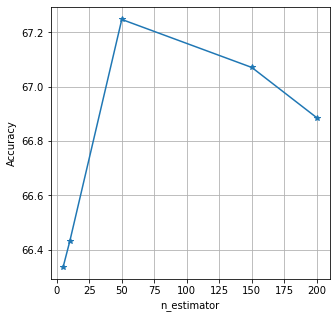

In [210]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.grid()
plt.plot(n_estimator11,ac_XB, "-*")
plt.xlabel('n_estimator')
plt.ylabel('Accuracy')

In [211]:
max_XB = max (ac_XB) 
max_XB

67.24770167272274

**Observations for Gradient Tree Boosting:**
1. The best validation accuracy is obtained at number of trees = 50 and random_state = 0.
2. The maximum validation accuracy is 67.247% with process time 18.7812 seconds.
3. From the above plot, it can be visualise that the accuracy is increasing for n_estimators 1 to 50. Also, the accuracy is decreasing from n_estimators 50 to 200.

## [CM3] : Analysis

**Observations:**
1. For Decision Tree Classifier: The best accuracy comes out to 66.46% when parameters are set to criterion = 'gini', max_depth = 5, random_state = 0 and splitter = best. Also, the computational time for these parameters is 0.3906 seconds.
2. For Random Forest Classifier: The best validation accuracy is observed for parameters max_depth = 5, number of trees = 200 and random_state = 0. The best validation accuracy is 67.079% with process time 11.7656 seconds.
3. For Gradient Boosting Classifier: The best validation accuracy is obtained at number of trees = 50 and random_state = 0. The best validation accuracy is 67.247% with process time 18.7812 seconds.
4. We can see that we are getting maximum validation accuracy nearly same with Gradient Boosting and Random forest. But Gradient Boosting is having very high computation time compared to Random Forest. Due to which we are considering Random Forest model for best validation accuracy.

Best Parameters for Random Forest Classifier : Max Depth = 5, No. of trees = 200 and random_state = 0 

# Naive Bayes Classifier
## [CM5]

In [212]:
## https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html?highlight=gaussian#sklearn.naive_bayes.GaussianNB

from sklearn.naive_bayes import GaussianNB
clf4 = GaussianNB() #clf is classfier
clf4.fit(x_train, y_train)

GaussianNB()

In [213]:
var = [ 1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
acc_nb = []
times = []
for v in var:
    clf4_crossval = GaussianNB(var_smoothing= v)
    t1 = time.process_time()
    score = cross_val_score(clf4_crossval, x_train, y_train, cv = 10)
    t2= time.process_time()
    acc_nb.append (score.mean()*100) #We will take mean of the accuracy score of 10 fold cross validation
    times.append(t2-t1) 
    ##We are calculating process time for each iteration to understand,
    ##how rich the computation process is.

In [214]:
for var_smoothing, accuracy,t in zip(var, acc_nb, times):
    print ( "For %.e var_smoothing , Accuracy is  %.4f in %.4f seconds" % (var_smoothing, accuracy, t))

For 1e-10 var_smoothing , Accuracy is  54.1182 in 0.3281 seconds
For 1e-09 var_smoothing , Accuracy is  54.1182 in 0.2812 seconds
For 1e-05 var_smoothing , Accuracy is  60.6701 in 0.3125 seconds
For 1e-03 var_smoothing , Accuracy is  62.9862 in 0.3906 seconds
For 1e-01 var_smoothing , Accuracy is  59.6682 in 0.2812 seconds


In [215]:
max_ac_NB= max(acc_nb)
max_ac_NB

62.98621570946761

Text(0, 0.5, 'Accuracy')

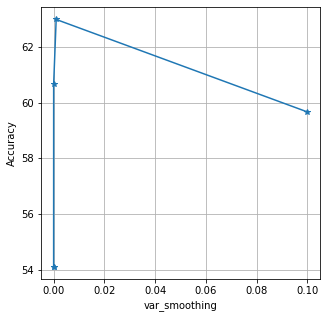

In [265]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.grid()
plt.plot(var,acc_nb, "-*")
plt.xlabel('var_smoothing')
plt.ylabel('Accuracy')

**Observations for Naive Bayes Classifier:**
1. The maximum accuracy is obtained at var_smoothing = 1e-03.
2. The maximum accuracy is 62.9862% with process time 0.3906 seconds.
3. From the above plot, it can be visualise that accuracy is minimum at var_smoothing = 1e-10 and it shows a decreasing trend from var_smoothing = 1e-03.

## [CM6]

Text(0, 0.5, 'Max. Accuracy of each ')

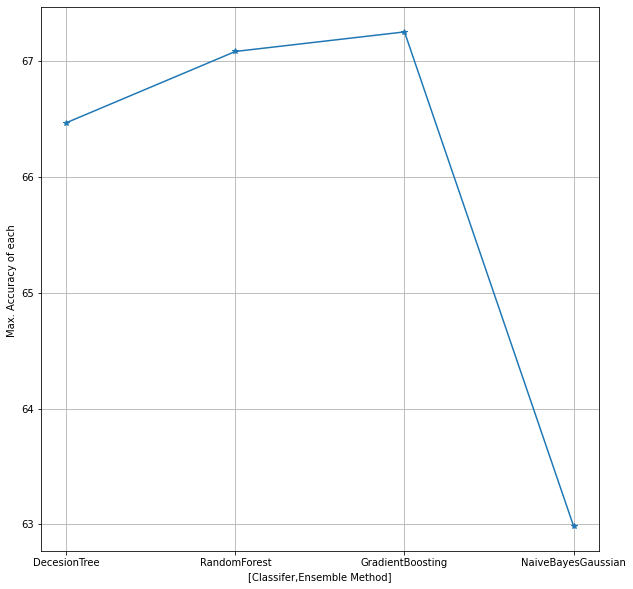

In [216]:
CLF = [ 'DecisionTree' , 'RandomForest' ,'GradientBoosting' , 'NaiveBayesGaussian']
Acc_CLF = [ max_DT,max_rf2, max_XB, max_ac_NB]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(CLF,Acc_CLF, "-*")
plt.xlabel('[Classifer,Ensemble Method]')
plt.ylabel('Max. Accuracy of each ')

**Observations:**

1. For Naive Bayes Classifier: The maximum accuracy is obtained at var_smoothing = 1e-03. The maximum accuracy is 62.9862% with process time 0.3906 seconds.
2. From the above plot, we can clearly state that NBGaussian Classifier is not a perfect model for this dataset. The accuracy of Naive Bayes is the least amongst all the 4 classifiers. 

## Model check with available test Data 

In [266]:
covid_model= RandomForestClassifier(max_depth=5, n_estimators=200, random_state=0)
#covid_model= GradientBoostingClassifier (n_estimators= 50 , random_state=0)
#covid_model= DecisionTreeClassifier(criterion = 'entropy' ,max_depth=10, random_state=0 , splitter = 'best')
#covid_model= GaussianNB(var_smoothing= 1e-03)
covid_model.fit(x_train,y_train)
t1= time.process_time()
y_pred= covid_model.predict(x_test)
t2=time.process_time()
time_RF_f= t2-t1
ac_test=accuracy_score(y_test,y_pred)*100
print ("Accuracy score ac_test for basic model = %.3f percent in %.3f seconds process time" %(ac_test , time_RF_f))

Accuracy score ac_test for basic model = 65.072 percent in 0.141 seconds process time


## For Test Data : Kaggle Submission : 

In [218]:
covid_test=pd.read_csv('covid_tests.csv')
covid_test.head(10)

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,80s,FEMALE,MISSING INFORMATION,Toronto,NaN,43.656591,-79.379358
1,80s,MALE,NO KNOWN EPI LINK,Toronto,Yes,43.656591,-79.379358
2,40s,FEMALE,OB,Stratford,Yes,43.368662,-81.001913
3,30s,MALE,NO KNOWN EPI LINK,Mississauga,NaN,43.647471,-79.708893
4,60s,MALE,NO KNOWN EPI LINK,London,NaN,42.981468,-81.254016
5,80s,MALE,OB,Mississauga,Yes,43.647471,-79.708893
6,90s,FEMALE,OB,Cornwall,Yes,45.029152,-74.736298
7,20s,MALE,NO KNOWN EPI LINK,Mississauga,NaN,43.647471,-79.708893
8,30s,MALE,CC,Chatham,NaN,42.403861,-82.208561
9,80s,MALE,OB,Toronto,Yes,43.656591,-79.379358


In [219]:
covid_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713 entries, 0 to 3712
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age_Group                3713 non-null   object 
 1   Client_Gender            3713 non-null   object 
 2   Case_AcquisitionInfo     3713 non-null   object 
 3   Reporting_PHU_City       3713 non-null   object 
 4   Outbreak_Related         1425 non-null   object 
 5   Reporting_PHU_Latitude   3713 non-null   float64
 6   Reporting_PHU_Longitude  3713 non-null   float64
dtypes: float64(2), object(5)
memory usage: 203.2+ KB


### Pre-processing the testing data 

In [220]:
covid_test["Outbreak_Related"].fillna("No",inplace= True)
covid_test.head(10)

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,80s,FEMALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358
1,80s,MALE,NO KNOWN EPI LINK,Toronto,Yes,43.656591,-79.379358
2,40s,FEMALE,OB,Stratford,Yes,43.368662,-81.001913
3,30s,MALE,NO KNOWN EPI LINK,Mississauga,No,43.647471,-79.708893
4,60s,MALE,NO KNOWN EPI LINK,London,No,42.981468,-81.254016
5,80s,MALE,OB,Mississauga,Yes,43.647471,-79.708893
6,90s,FEMALE,OB,Cornwall,Yes,45.029152,-74.736298
7,20s,MALE,NO KNOWN EPI LINK,Mississauga,No,43.647471,-79.708893
8,30s,MALE,CC,Chatham,No,42.403861,-82.208561
9,80s,MALE,OB,Toronto,Yes,43.656591,-79.379358


In [221]:
covid_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713 entries, 0 to 3712
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age_Group                3713 non-null   object 
 1   Client_Gender            3713 non-null   object 
 2   Case_AcquisitionInfo     3713 non-null   object 
 3   Reporting_PHU_City       3713 non-null   object 
 4   Outbreak_Related         3713 non-null   object 
 5   Reporting_PHU_Latitude   3713 non-null   float64
 6   Reporting_PHU_Longitude  3713 non-null   float64
dtypes: float64(2), object(5)
memory usage: 203.2+ KB


In [222]:
#Replacing <20 to 0 and from 20s to 90s to 1 to 8 values in the Age_Group feature 
#Converting String to numeric Values

covid_test.Age_Group = covid_test.Age_Group.replace({'<20':0,'20s':1,'30s':2,'40s':3,'50s':4,'60s':5,'70s':6,'80s':7,'90s':8})
covid_test

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,7,FEMALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358
1,7,MALE,NO KNOWN EPI LINK,Toronto,Yes,43.656591,-79.379358
2,3,FEMALE,OB,Stratford,Yes,43.368662,-81.001913
3,2,MALE,NO KNOWN EPI LINK,Mississauga,No,43.647471,-79.708893
4,5,MALE,NO KNOWN EPI LINK,London,No,42.981468,-81.254016
...,...,...,...,...,...,...,...
3708,7,MALE,OB,Whitby,Yes,43.898605,-78.940341
3709,2,FEMALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358
3710,7,MALE,OB,Oakville,Yes,43.413997,-79.744796
3711,7,FEMALE,OB,Thorold,Yes,43.116537,-79.241220


In [223]:
covid_test.head(10) #We can see the feature Age_group is changed in ascending order from under 20 to 90s Age group

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,7,FEMALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358
1,7,MALE,NO KNOWN EPI LINK,Toronto,Yes,43.656591,-79.379358
2,3,FEMALE,OB,Stratford,Yes,43.368662,-81.001913
3,2,MALE,NO KNOWN EPI LINK,Mississauga,No,43.647471,-79.708893
4,5,MALE,NO KNOWN EPI LINK,London,No,42.981468,-81.254016
5,7,MALE,OB,Mississauga,Yes,43.647471,-79.708893
6,8,FEMALE,OB,Cornwall,Yes,45.029152,-74.736298
7,1,MALE,NO KNOWN EPI LINK,Mississauga,No,43.647471,-79.708893
8,2,MALE,CC,Chatham,No,42.403861,-82.208561
9,7,MALE,OB,Toronto,Yes,43.656591,-79.379358


In [224]:
#covid_test.Reporting_PHU_City = covid_test.Reporting_PHU_City.replace({'Barrie':0,'Belleville':1,'Brantford': 2,'Brockville':3,'Chatham':4,'Cornwall':5,'Guelph':6,'Hamilton':7,'Kingston':8,'London':9,'Mississauga':10,'Newmarket':11,'North Bay':12,'Oakville':13,'Ottawa':14,'Owen Sound':15,'Pembroke':16,'Peterborough':17,'Point Edward':18,'Port Hope':19,'Sault Ste. Marie':20,'Simcoe':21,'St. Thomas':22,'Stratford':23,'Sudbury':24,'Thorold':25,'Thunder Bay':26,'Timmins':27,'Toronto':28,'Waterloo':29,'Whitby':30,'Windsor':31})
#covid_test

In [225]:
#https://stackoverflow.com/questions/38088652/pandas-convert-categories-to-numbers
covid_test.Reporting_PHU_City=pd.Categorical(covid_test.Reporting_PHU_City)
covid_test['Reporting_PHU_City'] = covid_test.Reporting_PHU_City.cat.codes

covid_test

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,7,FEMALE,MISSING INFORMATION,28,No,43.656591,-79.379358
1,7,MALE,NO KNOWN EPI LINK,28,Yes,43.656591,-79.379358
2,3,FEMALE,OB,23,Yes,43.368662,-81.001913
3,2,MALE,NO KNOWN EPI LINK,10,No,43.647471,-79.708893
4,5,MALE,NO KNOWN EPI LINK,9,No,42.981468,-81.254016
...,...,...,...,...,...,...,...
3708,7,MALE,OB,30,Yes,43.898605,-78.940341
3709,2,FEMALE,MISSING INFORMATION,28,No,43.656591,-79.379358
3710,7,MALE,OB,13,Yes,43.413997,-79.744796
3711,7,FEMALE,OB,25,Yes,43.116537,-79.241220


In [226]:
# One hot encoding (Binary encoding) 
# Creating the dummies for the categorical & binary features
#We have taken the Reporting PHU Cities in one hot encoding ,too . As label encoding labels with probability,
## which isn't true in the case of cities and not accurate.

covid_test_d= pd.get_dummies(covid_test, columns=['Client_Gender','Case_AcquisitionInfo','Outbreak_Related']) 
covid_test_d.head(10)

,Age_Group,Reporting_PHU_City,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE,Client_Gender_UNSPECIFIED,Case_AcquisitionInfo_CC,Case_AcquisitionInfo_MISSING INFORMATION,Case_AcquisitionInfo_NO KNOWN EPI LINK,Case_AcquisitionInfo_OB,Case_AcquisitionInfo_TRAVEL,Case_AcquisitionInfo_UNSPECIFIED EPI LINK,Outbreak_Related_No,Outbreak_Related_Yes
0,7,28,43.656591,-79.379358,1,0,0,0,1,0,0,0,0,1,0
1,7,28,43.656591,-79.379358,0,1,0,0,0,1,0,0,0,0,1
2,3,23,43.368662,-81.001913,1,0,0,0,0,0,1,0,0,0,1
3,2,10,43.647471,-79.708893,0,1,0,0,0,1,0,0,0,1,0
4,5,9,42.981468,-81.254016,0,1,0,0,0,1,0,0,0,1,0
5,7,10,43.647471,-79.708893,0,1,0,0,0,0,1,0,0,0,1
6,8,5,45.029152,-74.736298,1,0,0,0,0,0,1,0,0,0,1
7,1,10,43.647471,-79.708893,0,1,0,0,0,1,0,0,0,1,0
8,2,4,42.403861,-82.208561,0,1,0,1,0,0,0,0,0,1,0
9,7,28,43.656591,-79.379358,0,1,0,0,0,0,1,0,0,0,1


In [227]:
covid_test_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3713 entries, 0 to 3712
Data columns (total 15 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age_Group                                  3713 non-null   int64  
 1   Reporting_PHU_City                         3713 non-null   int8   
 2   Reporting_PHU_Latitude                     3713 non-null   float64
 3   Reporting_PHU_Longitude                    3713 non-null   float64
 4   Client_Gender_FEMALE                       3713 non-null   uint8  
 5   Client_Gender_MALE                         3713 non-null   uint8  
 6   Client_Gender_UNSPECIFIED                  3713 non-null   uint8  
 7   Case_AcquisitionInfo_CC                    3713 non-null   uint8  
 8   Case_AcquisitionInfo_MISSING INFORMATION   3713 non-null   uint8  
 9   Case_AcquisitionInfo_NO KNOWN EPI LINK     3713 non-null   uint8  
 10  Case_AcquisitionInfo_OB 

# Test data ,preprocessed and ready for prediction :

In [267]:
# example of training a final classification model
# fit final model
covid_model= RandomForestClassifier(max_depth=5, n_estimators=200, random_state=0)
#covid_model = GaussianNB(var_smoothing= 1e-03)
#covid_model= GradientBoostingClassifier (n_estimators= 50 , random_state=0)
#covid_model= DecisionTreeClassifier(criterion = 'gini' ,max_depth=10, random_state=0 , splitter = 'best')
covid_model.fit(x_train,y_train)


RandomForestClassifier(max_depth=5, n_estimators=200, random_state=0)

In [268]:
Xnew = covid_test_d
ynew = covid_model.predict(Xnew)

In [269]:
ynew


array(['Fatal', 'Fatal', 'Not Resolved', ..., 'Fatal', 'Fatal', 'Fatal'],
      dtype=object)

In [270]:
#https://www.marsja.se/how-to-convert-numpy-array-to-pandas-dataframe-examples/
Ynew_ = pd.DataFrame(ynew)
Ynew_.head()

,0
0,Fatal
1,Fatal
2,Not Resolved
3,Resolved
4,Resolved


In [271]:
#https://datatofish.com/export-dataframe-to-csv/
Ynew_.to_csv(r'C:/Users/Admin/Desktop/University of Waterloo/ECE 657A DKMA/Assignment 2/charmi.csv', index = False)

### The testing accuracy in kaggle is 81.33%.